In [1]:
""" How to use C3D network. """
import numpy as np
import cv2
#import cv
import torch
import torch.nn as nn
from torch.autograd import Variable
import os
import scipy.io as scio
from os.path import join
from glob import glob
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.transform import resize
from tqdm import tqdm
import pretrainedmodels.utils as utils
import pretrainedmodels
from LSTM import LSTMTagger
# from C3D_model import C3D
%matplotlib inline

In [2]:
data = scio.loadmat('save.mat')
xTrainFeature=data['Xtrain']
allY=data['yTrain']
xTestFeature=data['Xtest']
testY=data['yTest']

In [3]:
xTrainFeature=torch.from_numpy(xTrainFeature).type(torch.float)
xTrainFeature= Variable(xTrainFeature)
xTrainFeature=xTrainFeature.cuda(0)

In [4]:
xTestFeature=torch.from_numpy(xTestFeature).type(torch.float)
xTestFeature= Variable(xTestFeature)
xTestFeature=xTestFeature.cuda(0)

In [5]:
import gc
torch.cuda.empty_cache()
gc.collect()
lstm = LSTMTagger()
lstm.to(torch.device('cuda:0'))


LSTMTagger(
  (LSTM): LSTM(25088, 1000, batch_first=True)
  (Linear): Linear(in_features=1000, out_features=1, bias=True)
  (criteria): BCEWithLogitsLoss()
)

In [12]:
checkpoint = torch.load('./save/1kloss0.00037733039062004536.pth')
lstm.LSTM.load_state_dict(checkpoint['net1'])
lstm.Linear.load_state_dict(checkpoint['net2'])
lstm.opt.load_state_dict(checkpoint['optimizer'])

In [13]:
# lstm.eval()
with torch.no_grad():
    preY=lstm.forward(xTestFeature)
preY=np.array(preY.cpu())
# testY=np.array(testY.cpu()) 

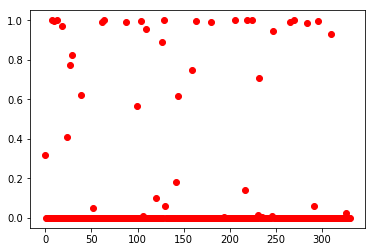

In [14]:
plt.figure()
plt.plot(range(len(preY)),(testY-preY)**2,'ro')
# plt.plot(range(len(testY)),testY,'bx')
plt.show()

In [15]:
sum=len(preY)
true = 0
for i in range(len(preY)):
    if int(preY[i]+0.5)==int(testY[i]):
        true+=1
print('acc:',true/sum)

acc: 0.9063444108761329


In [16]:
for i in range(len(preY)):
#     print('pre:{}\ttrain:{}'.format(preY[i],allY[i]))
    print('pre:{}\ttest:{}'.format(preY[i],testY[i]))

pre:[0.43671247]	test:[1]
pre:[0.9999982]	test:[1]
pre:[0.99998593]	test:[1]
pre:[0.00045469]	test:[0]
pre:[0.0003362]	test:[0]
pre:[0.0003361]	test:[0]
pre:[0.00033485]	test:[0]
pre:[0.00034349]	test:[1]
pre:[0.0003361]	test:[0]
pre:[0.00196408]	test:[1]
pre:[0.00714164]	test:[0]
pre:[0.999998]	test:[1]
pre:[0.9999584]	test:[1]
pre:[0.99999475]	test:[0]
pre:[0.999998]	test:[1]
pre:[0.01288869]	test:[0]
pre:[0.00034114]	test:[0]
pre:[0.9999982]	test:[1]
pre:[0.9849855]	test:[0]
pre:[0.02369943]	test:[0]
pre:[0.9999982]	test:[1]
pre:[0.9999981]	test:[1]
pre:[0.9999981]	test:[1]
pre:[0.9999981]	test:[1]
pre:[0.36199903]	test:[1]
pre:[0.99999654]	test:[1]
pre:[0.0003361]	test:[0]
pre:[0.87975764]	test:[0]
pre:[0.9992716]	test:[1]
pre:[0.9068035]	test:[0]
pre:[0.9999982]	test:[1]
pre:[0.00033809]	test:[0]
pre:[0.00181245]	test:[0]
pre:[0.999998]	test:[1]
pre:[0.99999785]	test:[1]
pre:[0.00090875]	test:[0]
pre:[0.999998]	test:[1]
pre:[0.9999982]	test:[1]
pre:[0.9975539]	test:[1]
pre:[0.2100